In [1]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
def neighbor(value):
    if value % L == 0:
        left = value + L - 1
        right = value + 1
    elif value % L == L - 1:
        left = value - 1
        right = value - L + 1
    else:
        left = value - 1
        right = value + 1

    if value < L:
        up = L ** 2 - L + value
        down = value + L
    elif value >= L ** 2 - L:
        up = value - L
        down = value - (L ** 2 - L)
    else:
        up = value - L
        down = value + L

    return [left, right, up, down]

In [3]:
def energy(S) :
    num = np.arange(L**2).reshape((L,L))
    E = 0

    for i in range(L**2) :
      temp=neighbor(i)
      n = S[np.where(num==i)]
      l = S[np.where(num==temp[0])]
      r = S[np.where(num==temp[1])]
      u = S[np.where(num==temp[2])]
      d = S[np.where(num==temp[3])]
      value = n*(l+r+u+d)
      E += value
    return float(-E/2)

In [4]:
def alp(old,new):
  if old < new :
    result = np.exp(B*(old-new))
  else :
    result = 1
  return result

<ipython-input-3-b81cb5d0816a>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(-E/2)


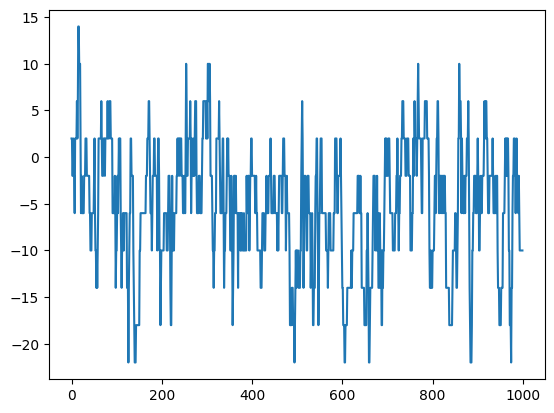

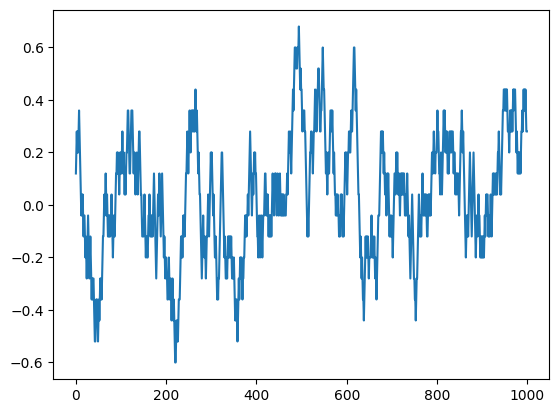

In [11]:
L = 5
B = 0.1
S = np.random.choice([-1, 1], size=(L, L))
E_list = []
m_list = []

for _ in range(1000) :
    random_index = np.random.randint(0, L, size=2)
    i, j = random_index
    new_S = np.copy(S)
    new_S[i, j] *= -1
    old = energy(S)
    new = energy(new_S)
    p = alp(old,new)
    value = np.random.choice([old, new], p=[1-p, p])
    if value == new :
      S = new_S

    E_list.append(energy(S))
    m_list.append(np.sum(S)/L**2)
plt.plot(E_list)
plt.show()
plt.plot(m_list)
plt.show()